<a href="https://colab.research.google.com/github/DeepCodeSec/ml1000-p3/blob/milestone3code/notebooks/group_1_project_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 1 Project

In [1]:
##@title Data Source
datafile = "./data-sample-clean-20K.csv" #@param {type:"string"}

In [2]:
import pandas as pd

# Load the pre-processed data into the df_features dataframe
df = pd.read_csv(datafile, sep=',')
print(f"Dataset '{datafile}' contains {df.shape[0]} row(s) and {df.shape[1]} column(s).")

Dataset './data-sample-clean-20K.csv' contains 7171 row(s) and 274 column(s).


## 1. Classification without PyCaret

In [3]:
# Make a copy of the dataset
df_without_pycaret = df.copy()

In [4]:
df_without_pycaret.describe()

img_count     has_form  has_login_form       has_js  js_include_b64  \
count  7171.000000  7171.000000     7171.000000  7171.000000     7171.000000   
mean      3.140148     0.752754        0.746758     0.857900        0.008646   
std       6.638001     0.431441        0.434899     0.349177        0.092587   
min       0.000000     0.000000        0.000000     0.000000        0.000000   
25%       1.000000     1.000000        0.000000     1.000000        0.000000   
50%       2.000000     1.000000        1.000000     1.000000        0.000000   
75%       3.000000     1.000000        1.000000     1.000000        0.000000   
max     230.000000     1.000000        1.000000     1.000000        1.000000   

         nb_tokens  nb_title_entities  nb_text_entities  bank_of_america  \
count  7171.000000        7171.000000       7171.000000      7171.000000   
mean     25.724306           0.170548          1.303584         0.001534   
std      14.853614           0.384211          1.332676         0.039138   
min       7.000000           0.000000          0.000000         0.000000   
25%      14.000000           0.000000          0.000000         0.000000   
50%      21.000000           0.000000          1.000000         0.000000   
75%      34.000000           0.000000          2.000000         0.000000   
max      70.000000           2.000000         15.000000         1.000000   

       wells_fargo  ...     unt sign  unt sign privacy  username password  \
count  7171.000000  ...  7171.000000       7171.000000        7171.000000   
mean      0.000837  ...     0.031097          0.031097           0.100683   
std       0.028916  ...     0.173593          0.173593           0.316295   
min       0.000000  ...     0.000000          0.000000           0.000000   
25%       0.000000  ...     0.000000          0.000000           0.000000   
50%       0.000000  ...     0.000000          0.000000           0.000000   
75%       0.000000  ...     0.000000          0.000000           0.000000   
max       1.000000  ...     1.000000          1.000000           2.000000   

       username password webmail  view shared  view shared file  \
count                7171.000000  7171.000000       7171.000000   
mean                    0.048529     0.030540          0.029982   
std                     0.214896     0.172079          0.170549   
min                     0.000000     0.000000          0.000000   
25%                     0.000000     0.000000          0.000000   
50%                     0.000000     0.000000          0.000000   
75%                     0.000000     0.000000          0.000000   
max                     1.000000     1.000000          1.000000   

       webmail login  webmail mini  webmail service  webmail welcome  
count    7171.000000   7171.000000      7171.000000      7171.000000  
mean        0.041417      0.047134         0.022870         0.029842  
std         0.200661      0.211941         0.157672         0.171796  
min         0.000000      0.000000         0.000000         0.000000  
25%         0.000000      0.000000         0.000000         0.000000  
50%         0.000000      0.000000         0.000000         0.000000  
75%         0.000000      0.000000         0.000000         0.000000  
max         2.000000      1.000000         2.000000         2.000000  

[8 rows x 271 columns]

In [5]:
df_without_pycaret

title_clean  img_count  has_form  \
0                                             one drive          1         0   
1                       email security : : user account          0         1   
2                               sign in to your account          4         1   
3                                           worldclient          2         1   
4                                   plantronics manager          0         1   
...                                                 ...        ...       ...   
7166  safeway wine & spirit and sobeys liquor - prin...          1         1   
7167                               update email address          2         0   
7168     educalingo , the dictionary for curious people        144         0   
7169                                     my - yahoo ! -          2         1   
7170                                  preference center          0         1   

      has_login_form  has_js  js_include_b64  nb_tokens  \
0                  0       1               0         31   
1                  1       1               0         19   
2                  1       0               0         14   
3                  1       1               0         13   
4                  1       1               0         18   
...              ...     ...             ...        ...   
7166               0       1               0          7   
7167               0       0               0         36   
7168               0       1               0         23   
7169               0       1               0         23   
7170               0       1               0         22   

                                             text_clean classification  \
0     one drive read document please choose email pr...      malicious   
1     email security user account verification neede...      malicious   
2     sign account nobody mycraftmail.com enter pass...      malicious   
3     worldclient microsoft office verification port...      malicious   
4     plantronics manager 2019 plantronics inc. righ...      malicious   
...                                                 ...            ...   
7166     safeway wine spirit sobeys liquor print coupon         benign   
7167  update email address hello thanks taking time ...         benign   
7168  educalingo dictionary curious people search c ...         benign   
7169  yahoo yahoo yahoo japan lowya paypay lowya pay...         benign   
7170  preference center preference center f e am.jll...         benign   

      nb_title_entities  ...  unt sign  unt sign privacy  username password  \
0                   0.0  ...         0                 0                  0   
1                   0.0  ...         0                 0                  0   
2                   0.0  ...         0                 0                  0   
3                   0.0  ...         0                 0                  0   
4                   0.0  ...         0                 0                  0   
...                 ...  ...       ...               ...                ...   
7166                0.0  ...         0                 0                  0   
7167                0.0  ...         0                 0                  0   
7168                0.0  ...         0                 0                  0   
7169                0.0  ...         0                 0                  0   
7170                0.0  ...         0                 0                  0   

      username password webmail  view shared  view shared file  webmail login  \
0                             0            1                 1              0   
1                             0            0                 0              0   
2                             0            0                 0              0   
3                             0            0                 0              0   
4                             0            0                 0              0   
...                         ...          ...      

### Required Imports and methods

In [6]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import matplotlib.pyplot as plt

In [8]:
from sklearn.metrics import classification_report

def run_svm(clf, x_train, y_train, x_test, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  print()
  print('classification_report')
  print(classification_report(y_test, y_pred))

In [9]:
import numpy as np

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [10]:
train_sizes = [1, 100, 200, 500, 1000, 2000, 3000, 4000, 5000, 5736]

In [11]:
### Bundling our previous work into a function ###
def learning_curves(estimator, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, 
    features, 
    target, 
    train_sizes = train_sizes,
    cv = cv, 
    scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,0.4)

### Plotting the two learning curves ###

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsRegressor

plt.figure(figsize = (16,5))

<Figure size 1600x500 with 0 Axes>

<Figure size 1600x500 with 0 Axes>

### Balance the Data

Text(0, 0.5, 'Count')

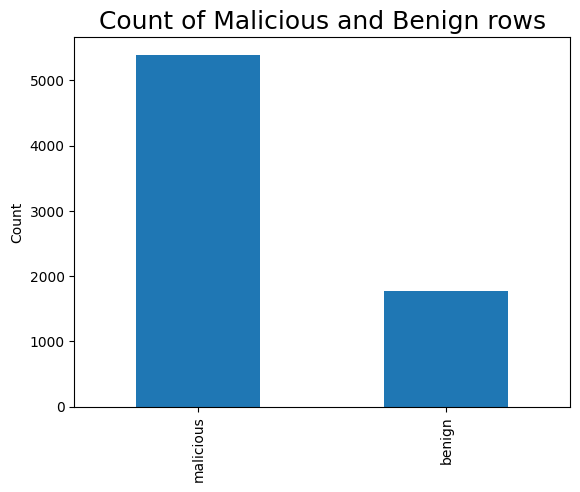

In [12]:
# Assume "df_features" is your DataFrame object
classification_counts = df_without_pycaret['classification'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of Malicious and Benign rows", fontsize=18)
plt.ylabel("Count")

#### Resampling strategies for imbalanced datasets

In [13]:
# Class count
count_class_0, count_class_1 = df_without_pycaret.classification.value_counts()

# Divide by class
df_class_0 = df_without_pycaret[df_without_pycaret['classification'] == 'malicious']
df_class_1 = df_without_pycaret[df_without_pycaret['classification'] == 'benign']

#### Random over-sampling

Random over-sampling:
malicious    5396
benign       5396
Name: classification, dtype: int64


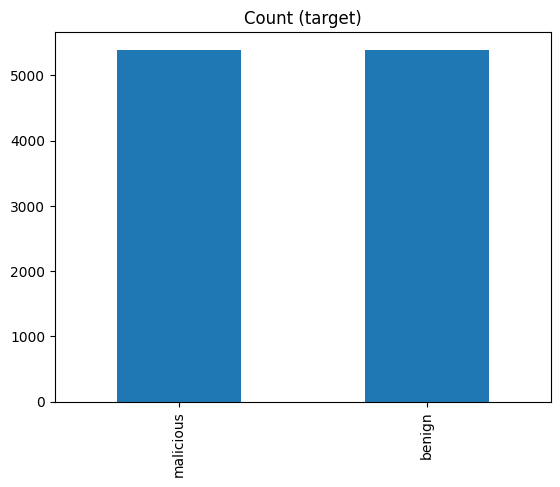

In [14]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.classification.value_counts())

df_test_over.classification.value_counts().plot(kind='bar', title='Count (target)');

### Convert non-numeric features to numeric

In [15]:
# Set classification malicious = 1, benign = 0
df_without_pycaret['classification'] = df_without_pycaret['classification'].map({'benign':0,'malicious':1})
df_without_pycaret.head()

title_clean  img_count  has_form  has_login_form  \
0                        one drive          1         0               0   
1  email security : : user account          0         1               1   
2          sign in to your account          4         1               1   
3                      worldclient          2         1               1   
4              plantronics manager          0         1               1   

   has_js  js_include_b64  nb_tokens  \
0       1               0         31   
1       1               0         19   
2       0               0         14   
3       1               0         13   
4       1               0         18   

                                          text_clean  classification  \
0  one drive read document please choose email pr...               1   
1  email security user account verification neede...               1   
2  sign account nobody mycraftmail.com enter pass...               1   
3  worldclient microsoft office verification port...               1   
4  plantronics manager 2019 plantronics inc. righ...               1   

   nb_title_entities  ...  unt sign  unt sign privacy  username password  \
0                0.0  ...         0                 0                  0   
1                0.0  ...         0                 0                  0   
2                0.0  ...         0                 0                  0   
3                0.0  ...         0                 0                  0   
4                0.0  ...         0                 0                  0   

   username password webmail  view shared  view shared file  webmail login  \
0                          0            1                 1              0   
1                          0            0                 0              0   
2                          0            0                 0              0   
3                          0            0                 0              0   
4                          0            0                 0              0   

   webmail mini  webmail service  webmail welcome  
0             0                0                0  
1             0                0                0  
2             0                0                0  
3             0                0                0  
4             0                0                0  

[5 rows x 274 columns]

In [16]:
df_without_pycaret = handle_non_numerical_data(df_without_pycaret)
print(df_without_pycaret.head())

   title_clean  img_count  has_form  has_login_form  has_js  js_include_b64  \
0         1171          1         0               0       1               0   
1          434          0         1               1       1               0   
2         1023          4         1               1       0               0   
3          634          2         1               1       1               0   
4         1082          0         1               1       1               0   

   nb_tokens  text_clean  classification  nb_title_entities  ...  unt sign  \
0         31        2180               1                0.0  ...         0   
1         19        1856               1                0.0  ...         0   
2         14         317               1                0.0  ...         0   
3         13         652               1                0.0  ...         0   
4         18        2435               1                0.0  ...         0   

   unt sign privacy  username password  username passwor

### Classification with Random Forest

#### Hyperparameter tuning for Random Forest using GridSearchCV

Hyperparameter tuning is an essential part of controlling the behavior of a machine learning model. If we don't correctly tune our hyperparameters, our estimated model parameters produce suboptimal results, as they don't minimize the loss function. This means our model makes more errors

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Split the dataframe into feature and target variables
X = df_without_pycaret.drop('classification', axis=1) 
y = df_without_pycaret['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a RandomForestClassifier model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, 
                           verbose=1, 
                           scoring="accuracy")

# Train the model
grid_search.fit(X_train, y_train)

grid_search.best_score_

rf_best = grid_search.best_estimator_
rf_best

Fitting 5 folds for each of 180 candidates, totalling 900 fits


RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

We determined from a previous hyperparameter tuning that the optimal number of trees to use is 200.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the dataframe into feature and target variables
X = df_without_pycaret.drop('classification', axis=1) 
y = df_without_pycaret['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a RandomForestClassifier model with 200 trees
rf = RandomForestClassifier(n_estimators=200, random_state=0)

# Train the model
rf.fit(X_train, y_train)

# Predict Class Probabilities
y_rf_proba = rf.predict_proba(X_test)
y_rf_pred = np.where(y_rf_proba[:,1] > 0.5, 1, 0)

#Predict the classes for testing data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
print("Training Accuracy :", rf.score(X_train, y_train))
print("Validation Accuracy :", rf.score(X_test, y_test))

Training Accuracy : 0.9776847977684798
Validation Accuracy : 0.9365853658536586


Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: Accuracy = Number of correct predictions Total number of predictions.

In [19]:
# Cross Validation Classification Accuracy
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.937 (0.007)


Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value.

In [20]:
# Cross Validation Classification LogLoss
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'neg_log_loss'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.286 (0.077)


AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

In [21]:
# Cross Validation Classification ROC AUC
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'roc_auc'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.967 (0.007)


The Mean Absolute refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

In [22]:
# Cross Validation Regression MAE
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.063 (0.007)


The Mean Squared Error (MSE) is defined as Mean or Average of the square of the difference between actual and estimated values.

In [23]:
# Cross Validation Regression MSE
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -0.063 (0.007)


R-squared is a statistical measure that represents the goodness of fit of a regression model. 

In [24]:
# Cross Validation Regression R^2
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'r2'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.660 (0.032)


In [25]:
run_svm(rf, X_train, y_train, X_test, y_test)


classification_report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       348
           1       0.96      0.96      0.96      1087

    accuracy                           0.94      1435
   macro avg       0.91      0.92      0.91      1435
weighted avg       0.94      0.94      0.94      1435



Visualize individual decision tress from a random forest.

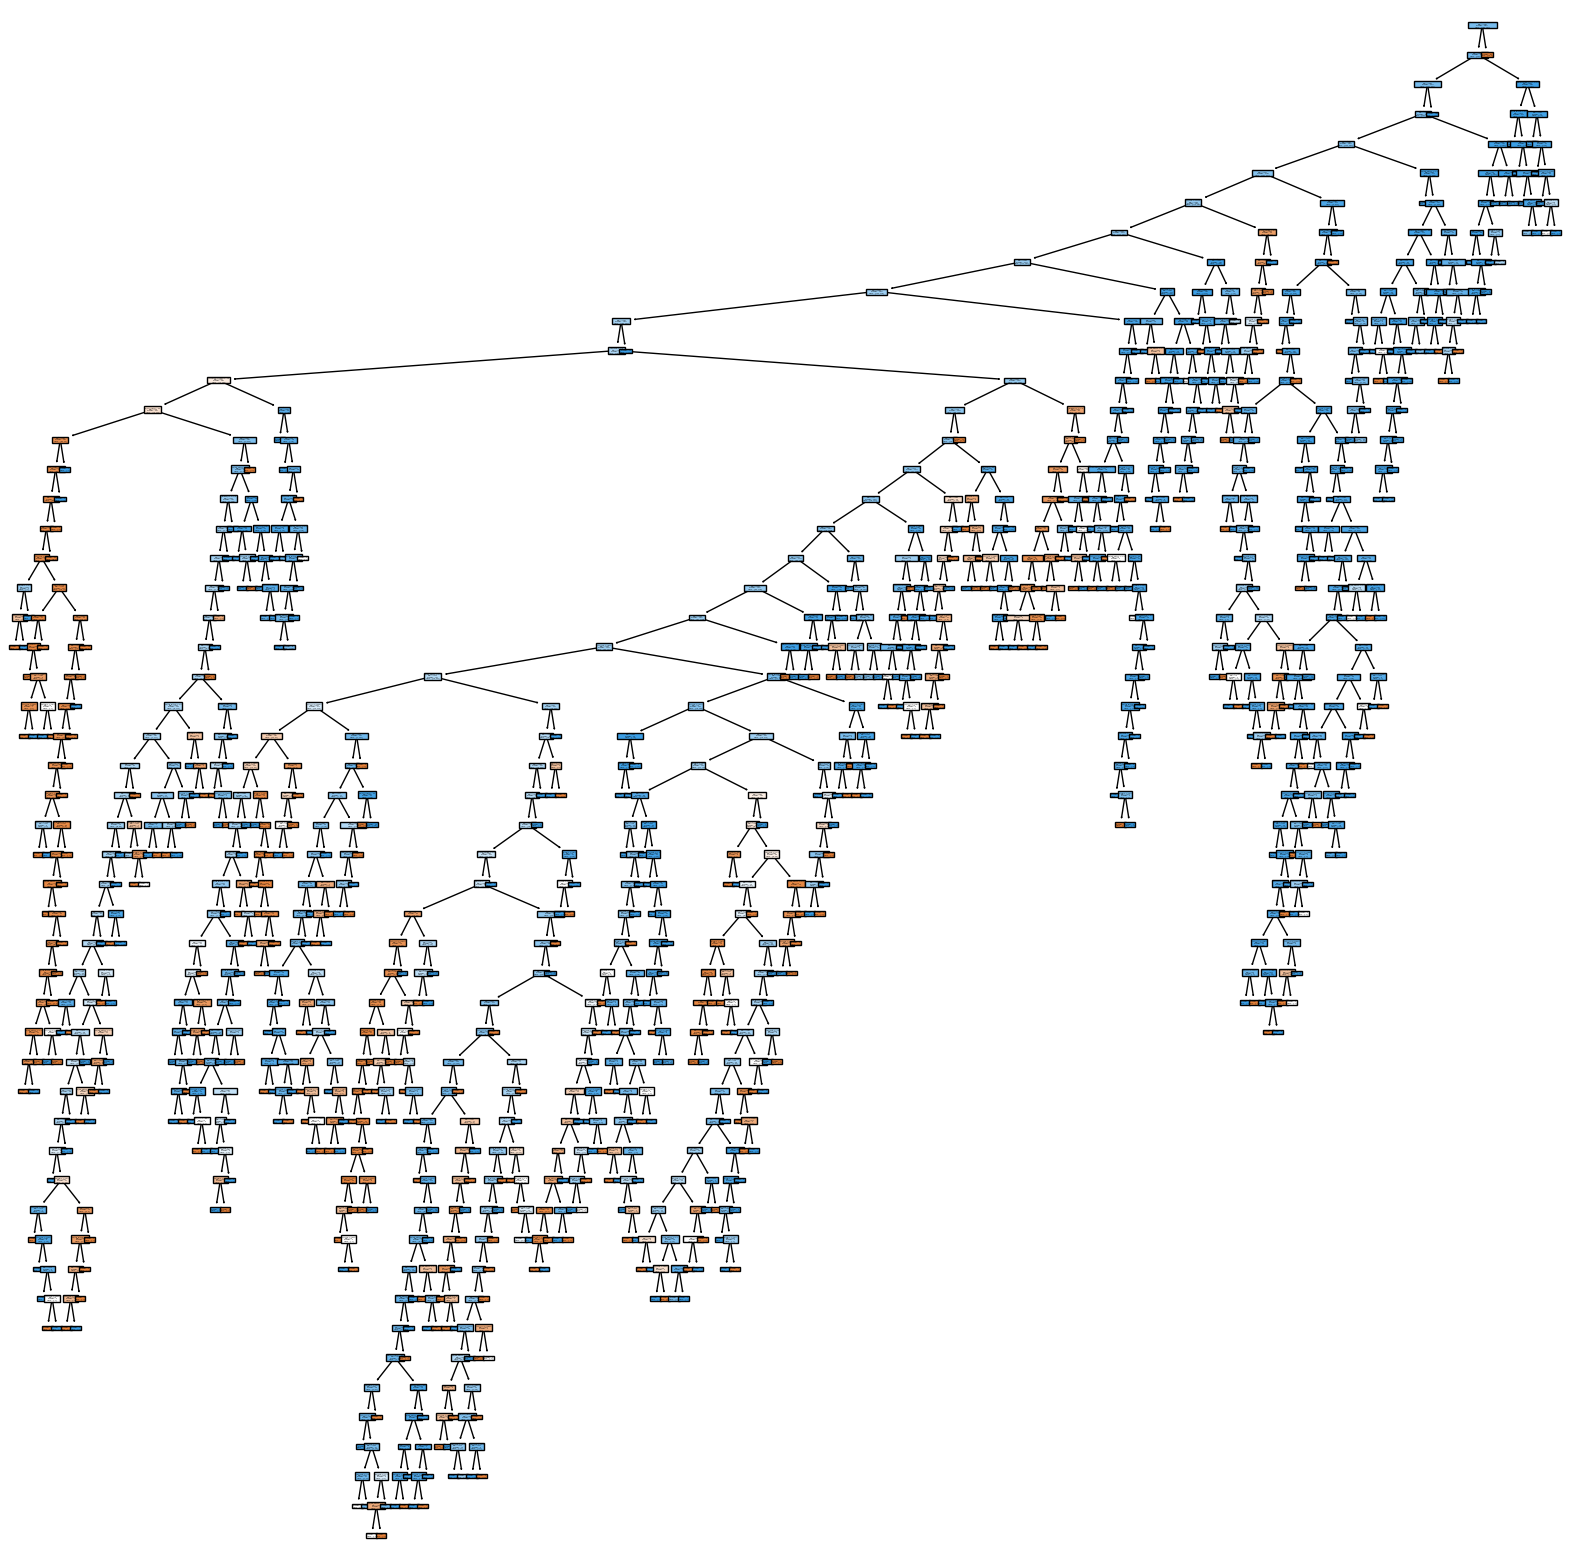

In [26]:
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

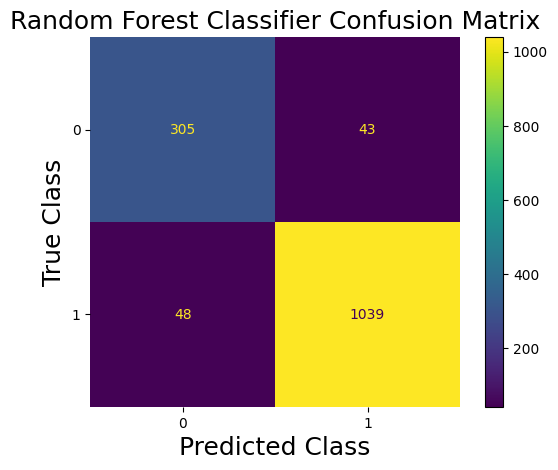

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.axis()
plt.grid(False)
plt.box(False)
plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('True Class', fontsize=18)
plt.title('Random Forest Classifier Confusion Matrix', fontsize=18)
plt.show()

Summary of Feature Importance:
title_clean: Score: 0.07210
img_count: Score: 0.07122
has_form: Score: 0.03006
has_login_form: Score: 0.13322
has_js: Score: 0.01029
js_include_b64: Score: 0.00098
nb_tokens: Score: 0.07343
text_clean: Score: 0.08923
nb_title_entities: Score: 0.01225
nb_text_entities: Score: 0.03226
bank_of_america: Score: 0.00027
wells_fargo: Score: 0.00070
citibank: Score: 0.00000
apple: Score: 0.00275
microsoft: Score: 0.00806
amazon: Score: 0.00242
google: Score: 0.00400
facebook: Score: 0.00068
dhl: Score: 0.00001
youtube: Score: 0.00000
whatsapp: Score: 0.00005
linkedin: Score: 0.00028
twitter: Score: 0.00023
access account: Score: 0.00277
account account: Score: 0.00099
account account create: Score: 0.00036
account another: Score: 0.00011
account another account: Score: 0.00020
account create: Score: 0.00326
account create one: Score: 0.00197
account doe: Score: 0.00095
account doe n: Score: 0.00110
account enter: Score: 0.00032
account enter password: Score: 0.00

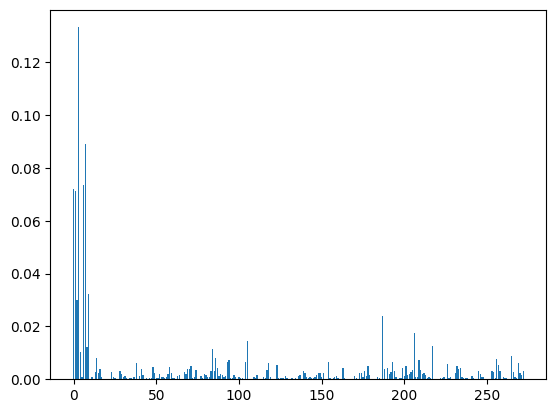

In [28]:
# get importance
importance = rf.feature_importances_

# summarize feature importance
print('Summary of Feature Importance:')
for i,v in enumerate(importance):
 print(rf.feature_names_in_[i] + ': Score: %.5f' % (v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

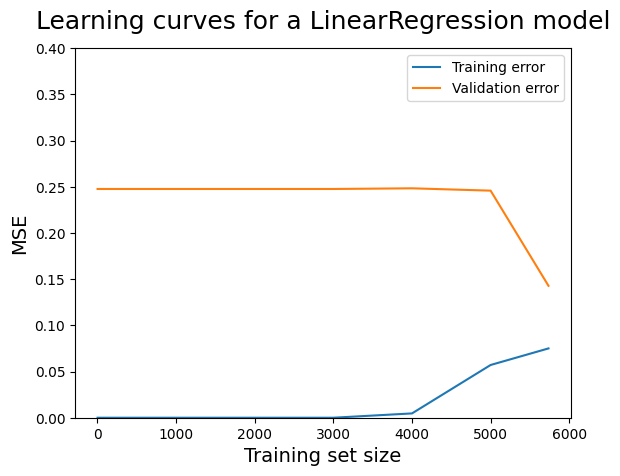

In [29]:
learning_curves(LinearRegression(), X, y, train_sizes, 5)

<Axes: title={'center': 'ROC Plot for Random Forest'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

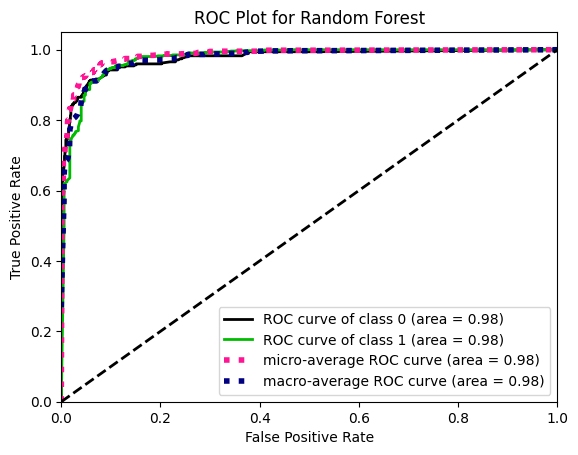

In [30]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, y_rf_proba, title = 'ROC Plot for Random Forest')

<Axes: title={'center': 'PR Curve for Random Forest'}, xlabel='Recall', ylabel='Precision'>

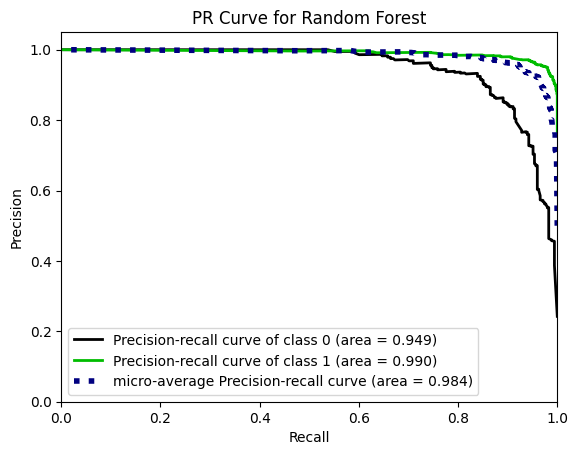

In [31]:
skplt.metrics.plot_precision_recall(y_test, y_rf_proba, title = 'PR Curve for Random Forest')

<Axes: title={'center': 'Cumulative Gains Chart for Random Forest'}, xlabel='Percentage of sample', ylabel='Gain'>

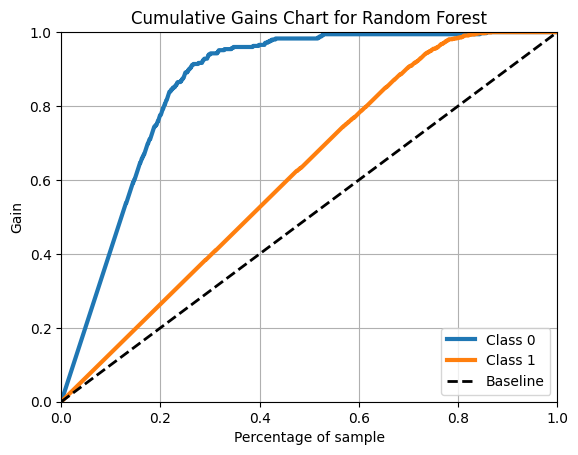

In [32]:
skplt.metrics.plot_cumulative_gain(y_test, y_rf_proba, title = 'Cumulative Gains Chart for Random Forest')

<Axes: title={'center': 'Lift Curve for Random Forest'}, xlabel='Percentage of sample', ylabel='Lift'>

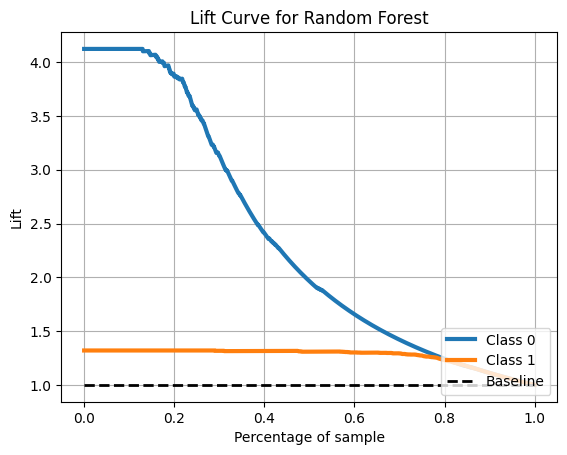

In [33]:
skplt.metrics.plot_lift_curve(y_test, y_rf_proba, title = 'Lift Curve for Random Forest')

Log Loss 
how close the prediction probability is to its corresponding value in binary classification. If the predicted probablity diverges far from the actual then the log-loss value is higher.  

In [34]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, rf.predict_proba(X_test))
logloss

0.197714593973872

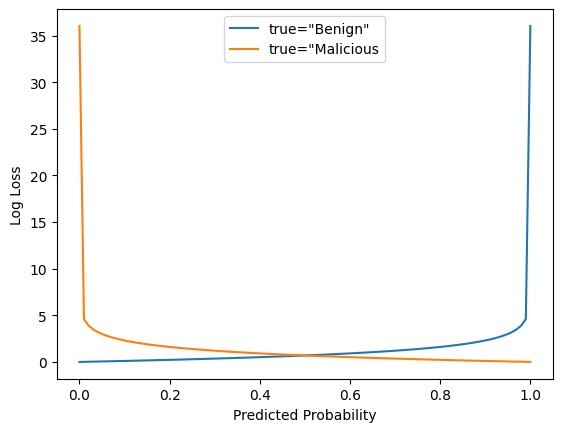

In [35]:
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]

# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]

# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]

# plot input to loss
plt.plot(yhat, losses_0, label='true="Benign"')
plt.plot(yhat, losses_1, label='true="Malicious')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

### Classification with Extra Trees

#### Hyperparameter tuning for Random Forest using GridSearchCV

Hyperparameter tuning is an essential part of controlling the behavior of a machine learning model. If we don't correctly tune our hyperparameters, our estimated model parameters produce suboptimal results, as they don't minimize the loss function. This means our model makes more errors

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Split the dataframe into feature and target variables
X = df_without_pycaret.drop('classification', axis=1) 
y = df_without_pycaret['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a ExtraTreesClassifier model
et = ExtraTreesClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=et,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Train the model
grid_search.fit(X_train, y_train)

grid_search.best_score_

ef_best = grid_search.best_estimator_
ef_best

Fitting 5 folds for each of 180 candidates, totalling 900 fits


ExtraTreesClassifier(max_depth=20, min_samples_leaf=5, n_estimators=10,
                     n_jobs=-1, random_state=42)

We determined from a previous hyperparameter tuning that the optimal number of trees to use is 50.

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# Split the dataframe into feature and target variables
X = df_without_pycaret.drop('classification', axis=1) 
y = df_without_pycaret['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a ExtraTreesClassifier model with 50 trees
et = ExtraTreesClassifier(n_estimators=50, random_state=0)

# Train the model
et.fit(X_train, y_train)

# Predict Class Probabilities
y_et_proba = et.predict_proba(X_test)
y_et_pred = np.where(y_et_proba[:,1] > 0.5, 1, 0)

#Predict the classes for testing data
y_pred = et.predict(X_test)

# Evaluate the model's performance
print("Training Accuracy :", et.score(X_train, y_train))
print("Validation Accuracy :", et.score(X_test, y_test))

Training Accuracy : 0.9776847977684798
Validation Accuracy : 0.9365853658536586


Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: Accuracy = Number of correct predictions Total number of predictions.

In [38]:
# Cross Validation Classification Accuracy
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.935 (0.006)


Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value.

In [39]:
# Cross Validation Classification LogLoss
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'neg_log_loss'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.630 (0.100)


AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

In [40]:
# Cross Validation Classification ROC AUC
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'roc_auc'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.957 (0.006)


The Mean Absolute refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

In [41]:
# Cross Validation Regression MAE
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.065 (0.006)


The Mean Squared Error (MSE) is defined as Mean or Average of the square of the difference between actual and estimated values.

In [42]:
# Cross Validation Regression MSE
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -0.065 (0.006)


R-squared is a statistical measure that represents the goodness of fit of a regression model. 

In [43]:
# Cross Validation Regression R^2
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'r2'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.650 (0.029)


In [44]:
run_svm(et, X_train, y_train, X_test, y_test)


classification_report
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       348
           1       0.96      0.95      0.96      1087

    accuracy                           0.94      1435
   macro avg       0.91      0.92      0.91      1435
weighted avg       0.94      0.94      0.94      1435



Visualize individual decision tress from extra trees.

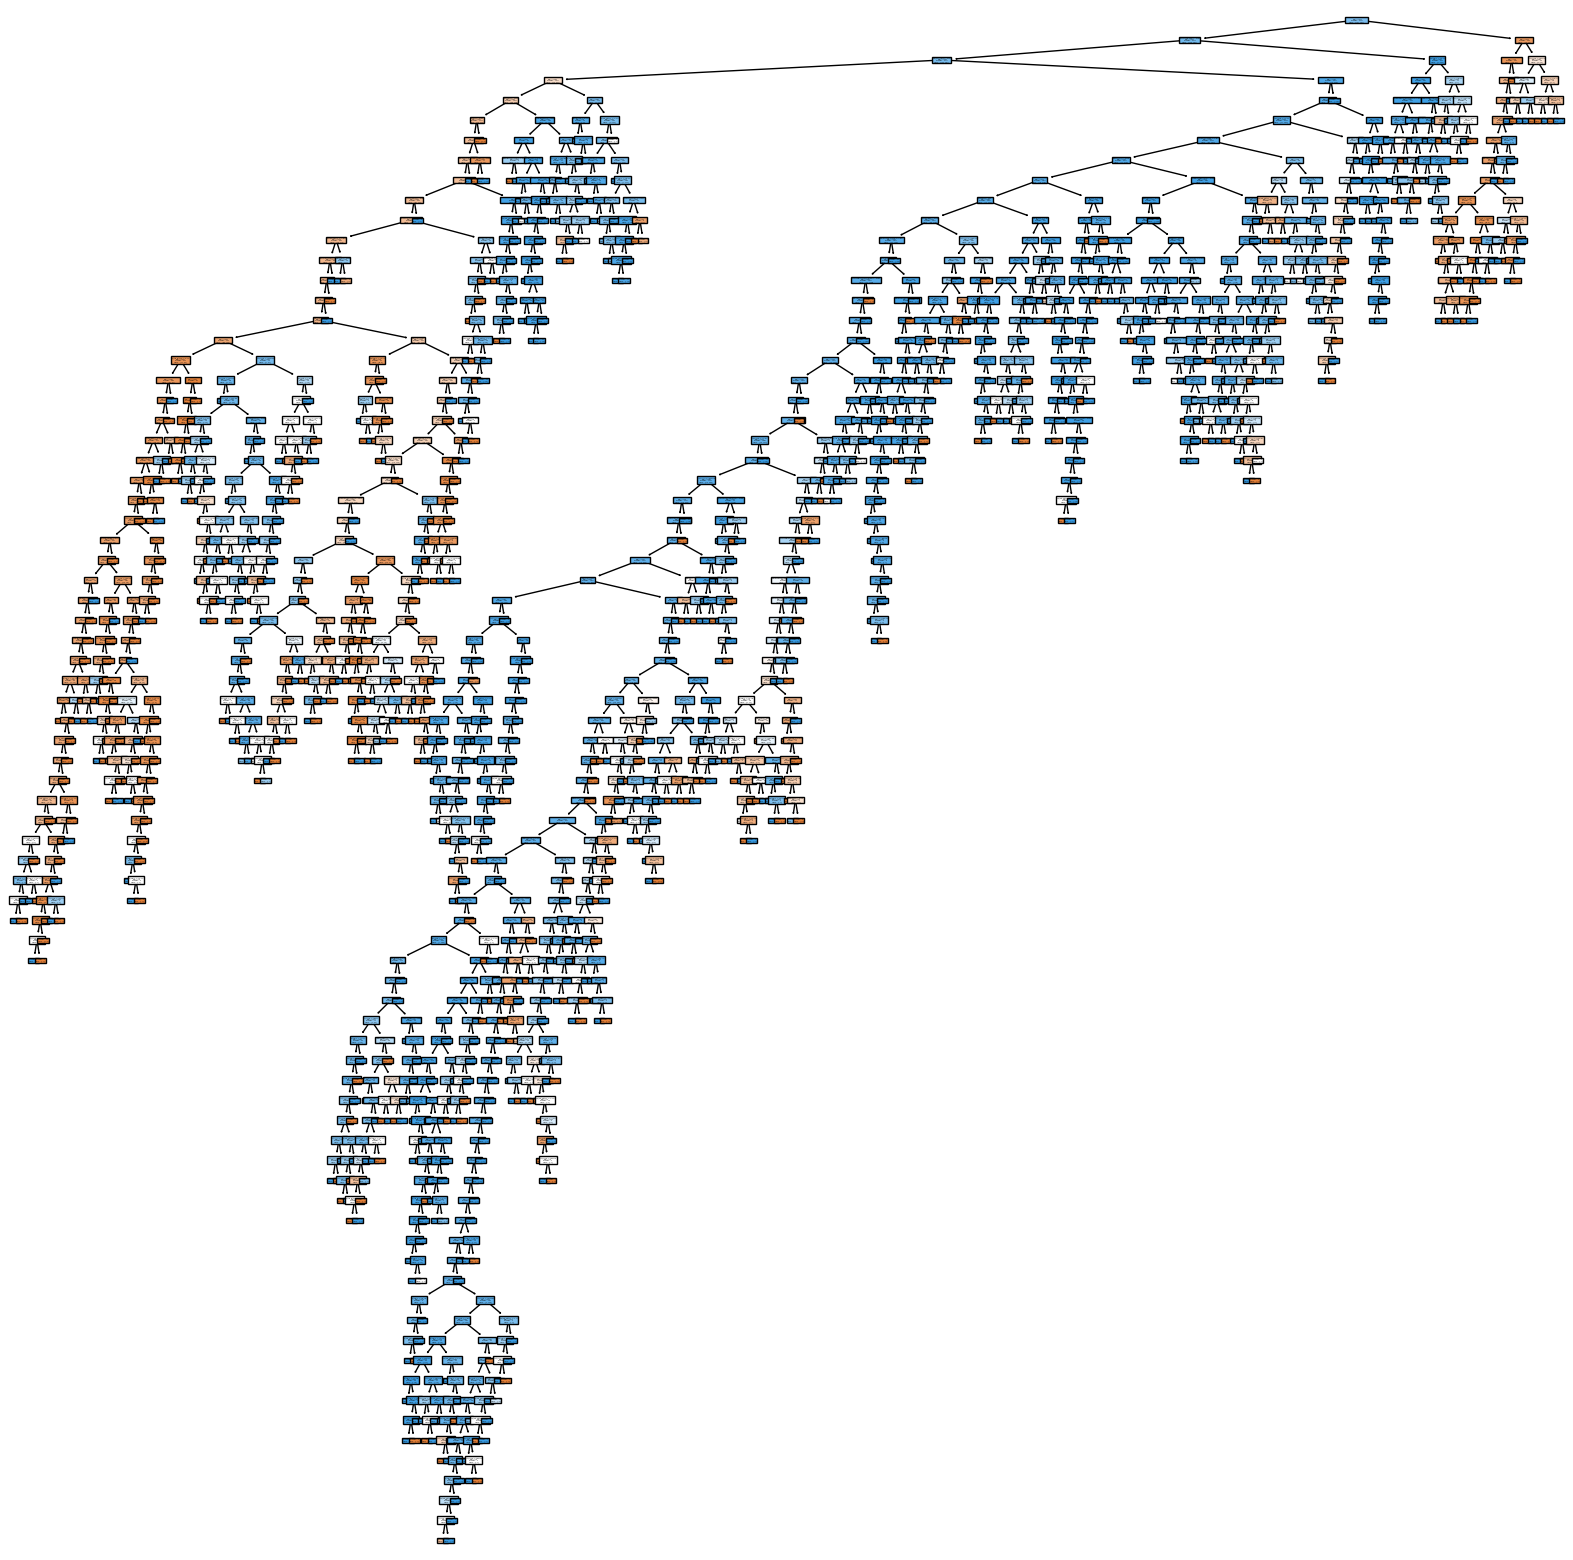

In [45]:
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(et.estimators_[0], feature_names=X.columns, filled=True)

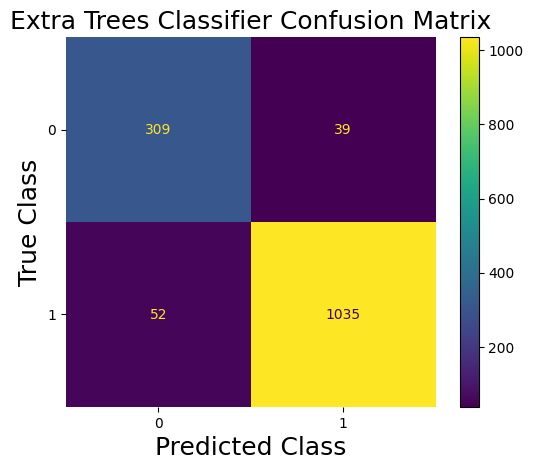

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.axis()
plt.grid(False)
plt.box(False)
plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('True Class', fontsize=18)
plt.title('Extra Trees Classifier Confusion Matrix', fontsize=18)
plt.show()

Summary of Feature Importance:
title_clean: Score: 0.04758
img_count: Score: 0.04243
has_form: Score: 0.03264
has_login_form: Score: 0.16019
has_js: Score: 0.01200
js_include_b64: Score: 0.00127
nb_tokens: Score: 0.04809
text_clean: Score: 0.06702
nb_title_entities: Score: 0.01468
nb_text_entities: Score: 0.03142
bank_of_america: Score: 0.00041
wells_fargo: Score: 0.00104
citibank: Score: 0.00000
apple: Score: 0.00430
microsoft: Score: 0.01463
amazon: Score: 0.00341
google: Score: 0.00272
facebook: Score: 0.00068
dhl: Score: 0.00000
youtube: Score: 0.00000
whatsapp: Score: 0.00001
linkedin: Score: 0.00020
twitter: Score: 0.00024
access account: Score: 0.00386
account account: Score: 0.00073
account account create: Score: 0.00016
account another: Score: 0.00029
account another account: Score: 0.00004
account create: Score: 0.00542
account create one: Score: 0.00104
account doe: Score: 0.00103
account doe n: Score: 0.00266
account enter: Score: 0.00035
account enter password: Score: 0.00

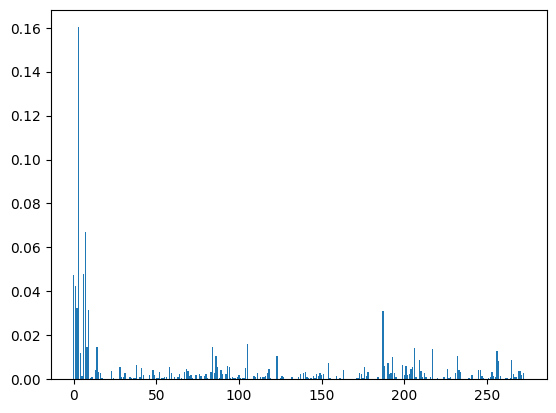

In [47]:
# get importance
importance = et.feature_importances_

# summarize feature importance
print('Summary of Feature Importance:')
for i,v in enumerate(importance):
 print(rf.feature_names_in_[i] + ': Score: %.5f' % (v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

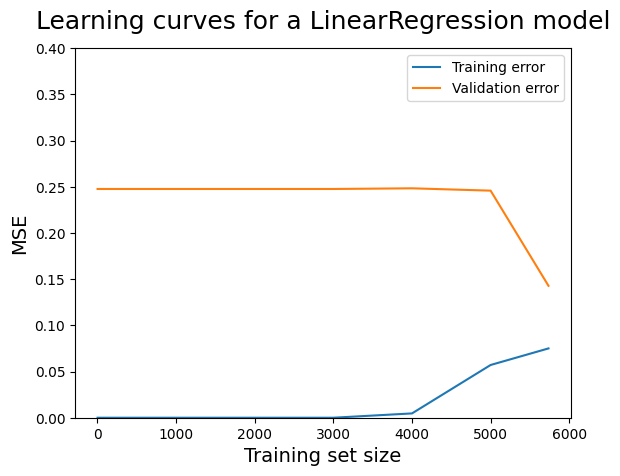

In [48]:
learning_curves(LinearRegression(), X, y, train_sizes, 5)

<Axes: title={'center': 'ROC Plot for Extra Trees'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

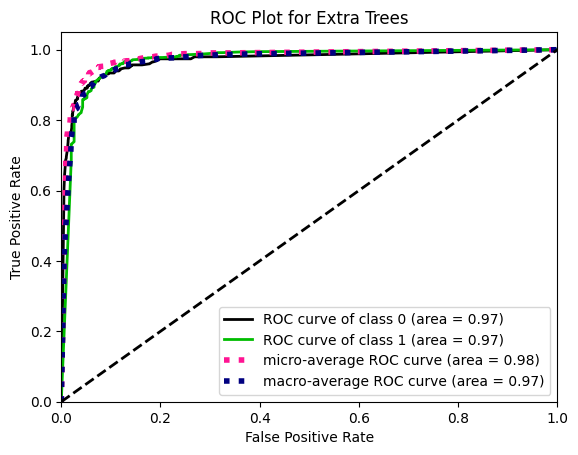

In [49]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, y_et_proba, title = 'ROC Plot for Extra Trees')

<Axes: title={'center': 'PR Curve for Extra Trees'}, xlabel='Recall', ylabel='Precision'>

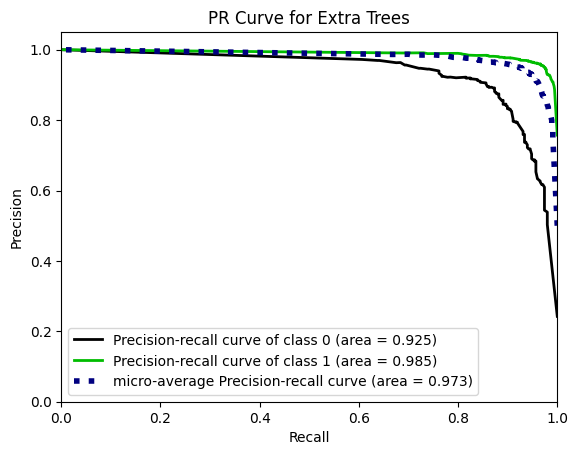

In [50]:
skplt.metrics.plot_precision_recall(y_test, y_et_proba, title = 'PR Curve for Extra Trees')

<Axes: title={'center': 'Cumulative Gains Chart for Extra Trees'}, xlabel='Percentage of sample', ylabel='Gain'>

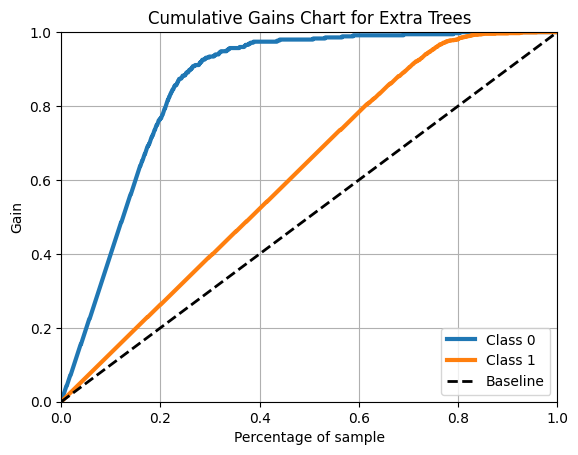

In [51]:
skplt.metrics.plot_cumulative_gain(y_test, y_et_proba, title = 'Cumulative Gains Chart for Extra Trees')

<Axes: title={'center': 'Lift Curve for Extra Trees'}, xlabel='Percentage of sample', ylabel='Lift'>

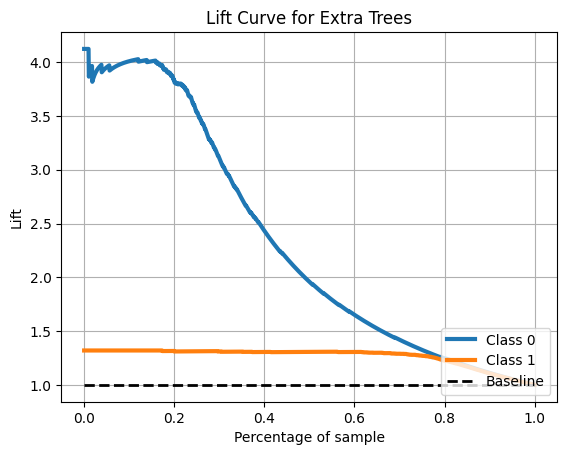

In [52]:
skplt.metrics.plot_lift_curve(y_test, y_et_proba, title = 'Lift Curve for Extra Trees')

Log Loss 
how close the prediction probability is to its corresponding value in binary classification. If the predicted probablity diverges far from the actual then the log-loss value is higher.  

In [53]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, et.predict_proba(X_test))
logloss

0.45449579143594315

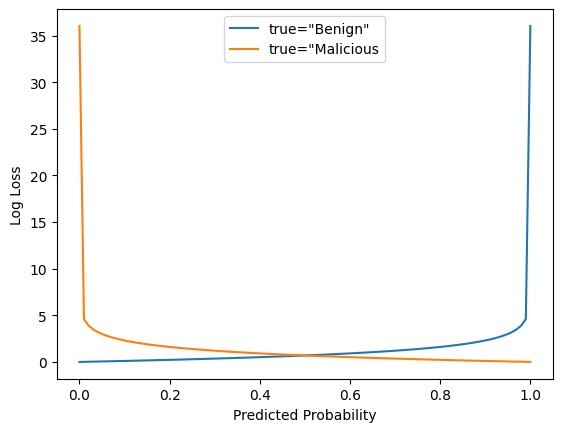

In [54]:
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]

# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]

# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]

# plot input to loss
plt.plot(yhat, losses_0, label='true="Benign"')
plt.plot(yhat, losses_1, label='true="Malicious')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

### Classification with K-Nearest Neighbors (KNN)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split the dataframe into feature and target variables
X = df_without_pycaret.drop('classification', axis=1) 
y = df_without_pycaret['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a KNeighborsClassifier model with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

#Predict the classes for testing data
y_pred = rf.predict(X_test)

# Predict Class Probabilities
y_knn_proba = knn.predict_proba(X_test)
y_knn_pred = np.where(y_knn_proba[:,1] > 0.5, 1, 0)

# Evaluate the model's performance
print("Training Accuracy :", knn.score(X_train, y_train))
print("Validation Accuracy :", knn.score(X_test, y_test))

Training Accuracy : 0.9006276150627615
Validation Accuracy : 0.8515679442508711


Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: Accuracy = Number of correct predictions Total number of predictions.

In [56]:
# Cross Validation Classification Accuracy
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
results = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.862 (0.013)


Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value.

In [57]:
# Cross Validation Classification LogLoss
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'neg_log_loss'
results = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -2.572 (0.326)


AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

In [58]:
# Cross Validation Classification ROC AUC
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'roc_auc'
results = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.842 (0.017)


The Mean Absolute refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

In [59]:
# Cross Validation Regression MAE
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.138 (0.013)


The Mean Squared Error (MSE) is defined as Mean or Average of the square of the difference between actual and estimated values.

In [60]:
# Cross Validation Regression MSE
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -0.138 (0.013)


R-squared is a statistical measure that represents the goodness of fit of a regression model. 

In [61]:
# Cross Validation Regression R^2
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'r2'
results = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.256 (0.066)


In [62]:
run_svm(knn, X_train, y_train, X_test, y_test)


classification_report
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       348
           1       0.89      0.92      0.90      1087

    accuracy                           0.85      1435
   macro avg       0.80      0.78      0.79      1435
weighted avg       0.85      0.85      0.85      1435



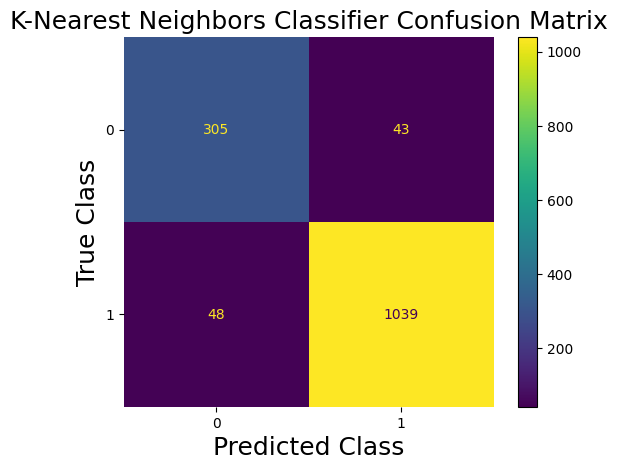

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.axis()
plt.grid(False)
plt.box(False)
plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('True Class', fontsize=18)
plt.title('K-Nearest Neighbors Classifier Confusion Matrix', fontsize=18)
plt.show()

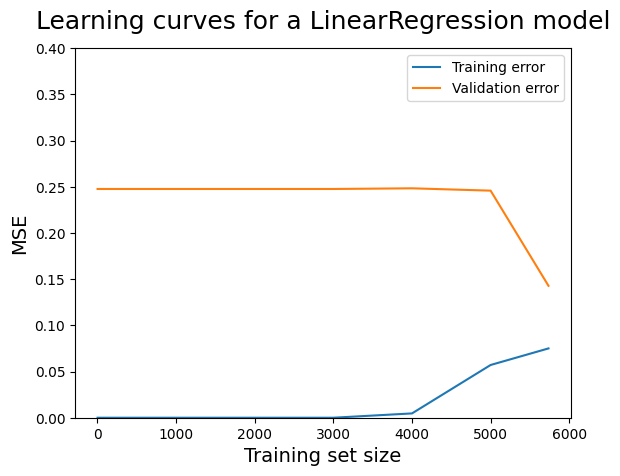

In [64]:
learning_curves(LinearRegression(), X, y, train_sizes, 5)

<Axes: title={'center': 'ROC Plot for K-Nearest Neighbors'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

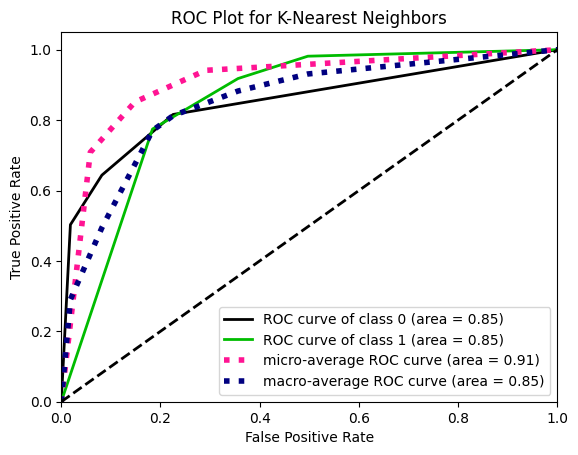

In [65]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, y_knn_proba, title = 'ROC Plot for K-Nearest Neighbors')

<Axes: title={'center': 'PR Curve for K-Nearest Neighbors'}, xlabel='Recall', ylabel='Precision'>

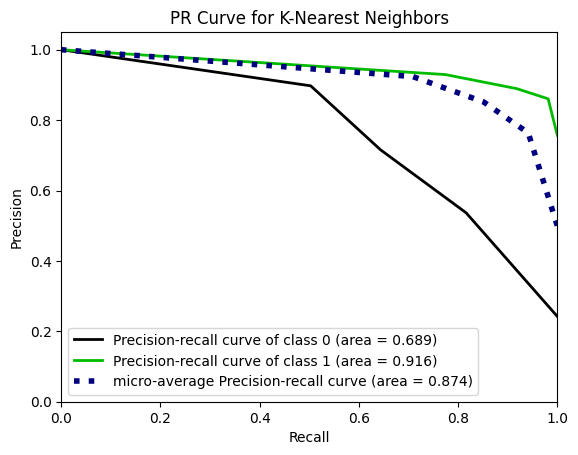

In [66]:
skplt.metrics.plot_precision_recall(y_test, y_knn_proba, title = 'PR Curve for K-Nearest Neighbors')

<Axes: title={'center': 'Cumulative Gains Chart for K-Nearest Neighbors'}, xlabel='Percentage of sample', ylabel='Gain'>

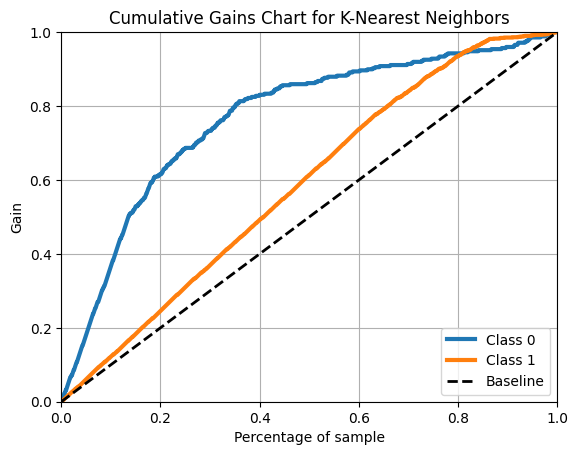

In [67]:
skplt.metrics.plot_cumulative_gain(y_test, y_knn_proba, title = 'Cumulative Gains Chart for K-Nearest Neighbors')

<Axes: title={'center': 'Lift Curve for K-Nearest Neighbors'}, xlabel='Percentage of sample', ylabel='Lift'>

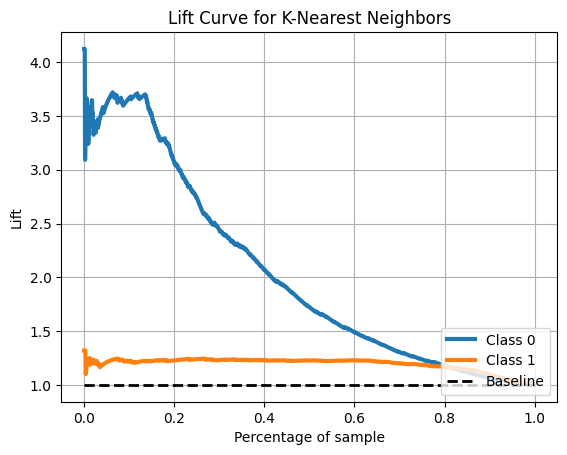

In [68]:
skplt.metrics.plot_lift_curve(y_test, y_knn_proba, title = 'Lift Curve for K-Nearest Neighbors')

Log Loss 
how close the prediction probability is to its corresponding value in binary classification. If the predicted probablity diverges far from the actual then the log-loss value is higher.  

In [69]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, knn.predict_proba(X_test))
logloss

2.266556248840558

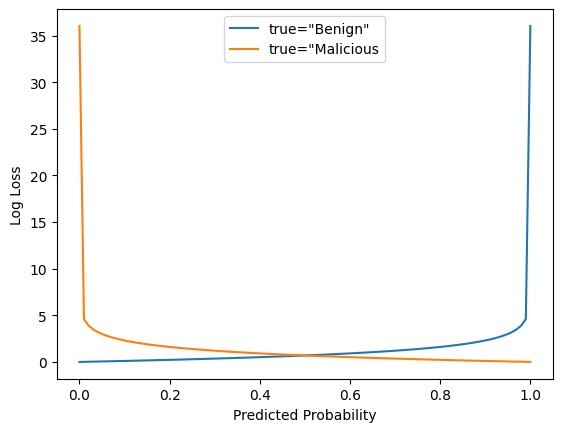

In [70]:
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]

# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]

# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]

# plot input to loss
plt.plot(yhat, losses_0, label='true="Benign"')
plt.plot(yhat, losses_1, label='true="Malicious')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

### Summary of Classification without PyCaret

<Axes: title={'center': 'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

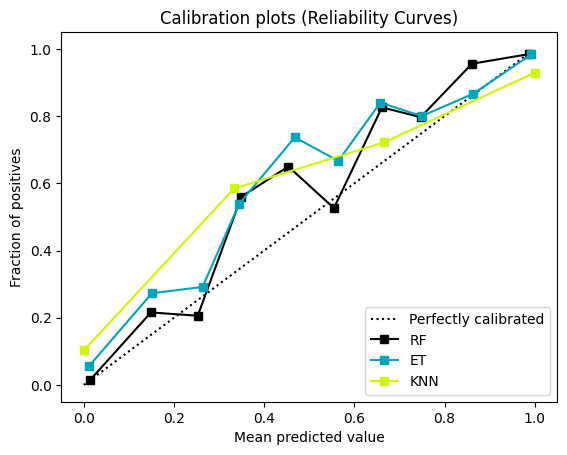

In [71]:
probas_list = [y_rf_proba, y_et_proba, y_knn_proba]
clf_names = ['RF', 'ET', 'KNN']
skplt.metrics.plot_calibration_curve(y_test, probas_list = probas_list, clf_names = clf_names)

## 2. Classification with PyCaret

In [72]:
# Make a copy of the dataset
df_with_pycaret = df.copy()

In [73]:
df_with_pycaret.describe()

img_count     has_form  has_login_form       has_js  js_include_b64  \
count  7171.000000  7171.000000     7171.000000  7171.000000     7171.000000   
mean      3.140148     0.752754        0.746758     0.857900        0.008646   
std       6.638001     0.431441        0.434899     0.349177        0.092587   
min       0.000000     0.000000        0.000000     0.000000        0.000000   
25%       1.000000     1.000000        0.000000     1.000000        0.000000   
50%       2.000000     1.000000        1.000000     1.000000        0.000000   
75%       3.000000     1.000000        1.000000     1.000000        0.000000   
max     230.000000     1.000000        1.000000     1.000000        1.000000   

         nb_tokens  nb_title_entities  nb_text_entities  bank_of_america  \
count  7171.000000        7171.000000       7171.000000      7171.000000   
mean     25.724306           0.170548          1.303584         0.001534   
std      14.853614           0.384211          1.332676         0.039138   
min       7.000000           0.000000          0.000000         0.000000   
25%      14.000000           0.000000          0.000000         0.000000   
50%      21.000000           0.000000          1.000000         0.000000   
75%      34.000000           0.000000          2.000000         0.000000   
max      70.000000           2.000000         15.000000         1.000000   

       wells_fargo  ...     unt sign  unt sign privacy  username password  \
count  7171.000000  ...  7171.000000       7171.000000        7171.000000   
mean      0.000837  ...     0.031097          0.031097           0.100683   
std       0.028916  ...     0.173593          0.173593           0.316295   
min       0.000000  ...     0.000000          0.000000           0.000000   
25%       0.000000  ...     0.000000          0.000000           0.000000   
50%       0.000000  ...     0.000000          0.000000           0.000000   
75%       0.000000  ...     0.000000          0.000000           0.000000   
max       1.000000  ...     1.000000          1.000000           2.000000   

       username password webmail  view shared  view shared file  \
count                7171.000000  7171.000000       7171.000000   
mean                    0.048529     0.030540          0.029982   
std                     0.214896     0.172079          0.170549   
min                     0.000000     0.000000          0.000000   
25%                     0.000000     0.000000          0.000000   
50%                     0.000000     0.000000          0.000000   
75%                     0.000000     0.000000          0.000000   
max                     1.000000     1.000000          1.000000   

       webmail login  webmail mini  webmail service  webmail welcome  
count    7171.000000   7171.000000      7171.000000      7171.000000  
mean        0.041417      0.047134         0.022870         0.029842  
std         0.200661      0.211941         0.157672         0.171796  
min         0.000000      0.000000         0.000000         0.000000  
25%         0.000000      0.000000         0.000000         0.000000  
50%         0.000000      0.000000         0.000000         0.000000  
75%         0.000000      0.000000         0.000000         0.000000  
max         2.000000      1.000000         2.000000         2.000000  

[8 rows x 271 columns]

### Model Generation

With the `DataFrame` containing all the features generated, we use to generate a model to match the label defined in the `classification` column.

In [74]:
#@title Classifier Options
sid = 1337 #@param {type:"integer"}
training_size = 0.85 #@param { type:"number" }

In [75]:
%%capture
!pip install pycaret

To avoid generating the "Numba needs NumPy 1.20 or less" exception, we ensure the numba package is upgraded before doing anything else.

In [76]:
%%capture
!pip install numba --upgrade

#### Create the Classifier

We can then generate our classifier object using the following options:
* `transformation`.
* `normalize`.
* `fix_imbalance`. Since we have more sites labeled as malicious, we ask `pycaret` to consider potential sample imbalances.
* `remove_multicollinearity`. Remove features with the inter-correlations higher than the defined threshold of 0.95.

In [77]:
from pycaret.classification import *

# Create a PyCaret Classification experiment
s = setup(data=df_with_pycaret,
          session_id=sid,
          transformation=True, #applies the power transform to make data more Gaussian-like
          normalize=True, #transforms the numeric features by scaling them to a given range (default is z-score)
          fix_imbalance=True, # SMOTE (Synthetic Minority Over-sampling Technique) is applied to create synthetic datapoints for minority class.
          remove_multicollinearity=True, #features with the inter-correlations higher than the defined threshold are removed
          multicollinearity_threshold = 0.95,
          train_size=training_size,
          target="classification"
          )

#### Select Model

In [78]:
# Compare multiple models and select the best
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

During the comparison, the top 2 classifier identified by `pycaret` are the _rf_ and _et_ classifiers. The _rf_ classifier reached an accuracy of 94.6%, a recall of 97.5% and precision of 95.2%. The _et_ classifier obtained 94.4% accuracy, a 97.3% recall but has a precision rate at 95.2%. The _rf_ and the _et_ classifier have very similar scores therefore further investigation is required to select one.

#### Random Forest Classifier

In [79]:
#evaluate_model(m_rf)

In [80]:
m_rf = create_model("rf")

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

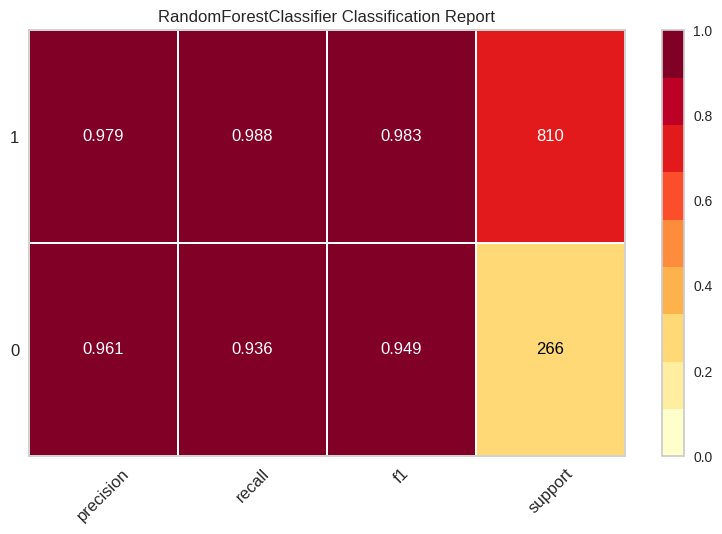

In [81]:
plot_model(m_rf, plot = 'class_report')

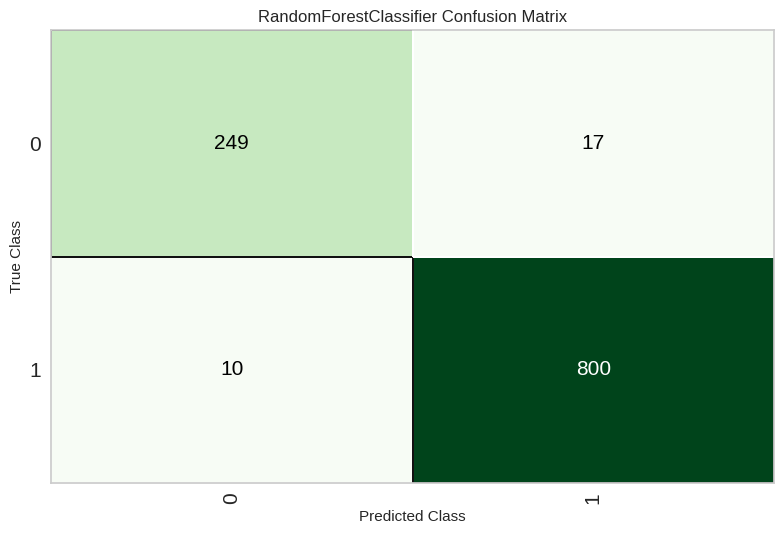

In [82]:
# plot confusion matrix
plot_model(m_rf, plot = 'confusion_matrix')

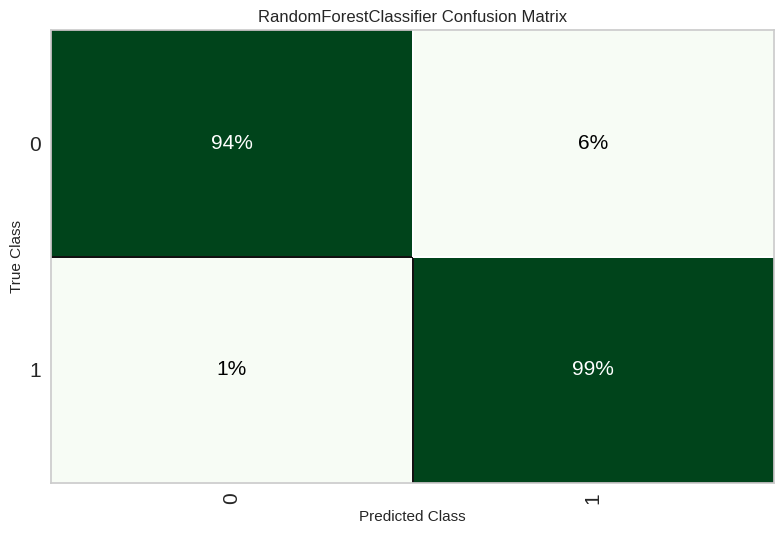

In [83]:
# plot confusion matrix
plot_model(m_rf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

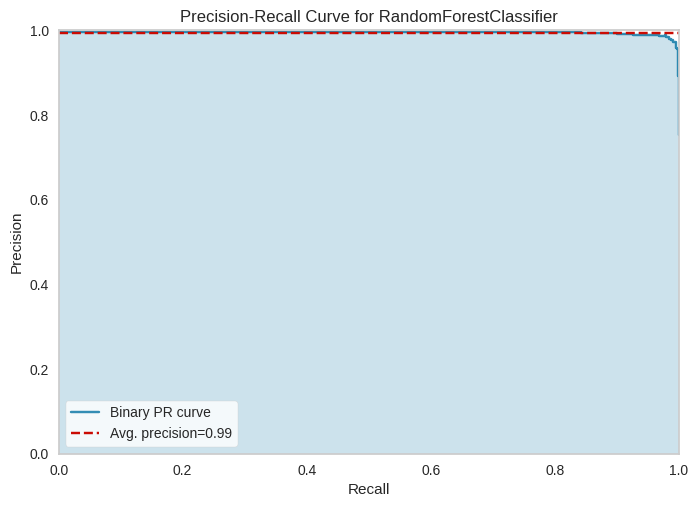

In [84]:
plot_model(m_rf, plot = 'pr')

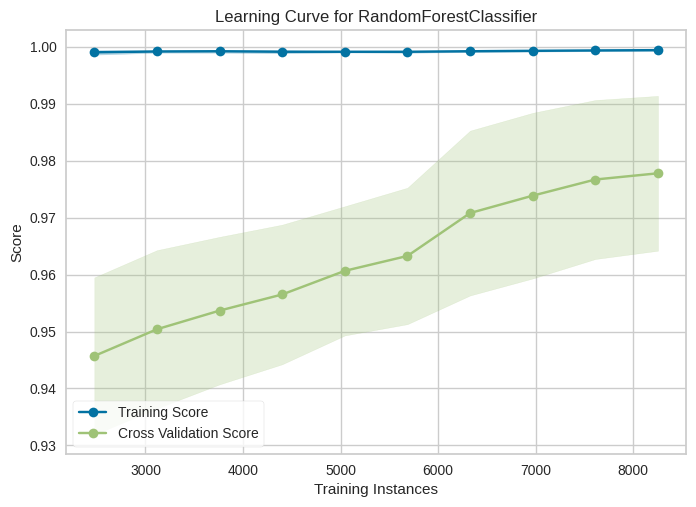

In [85]:
plot_model(m_rf, plot = 'learning')

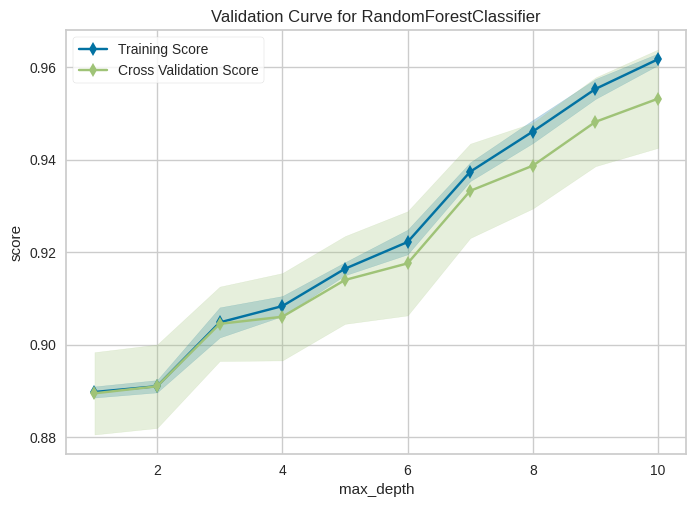

In [86]:
plot_model(m_rf, plot = 'vc')

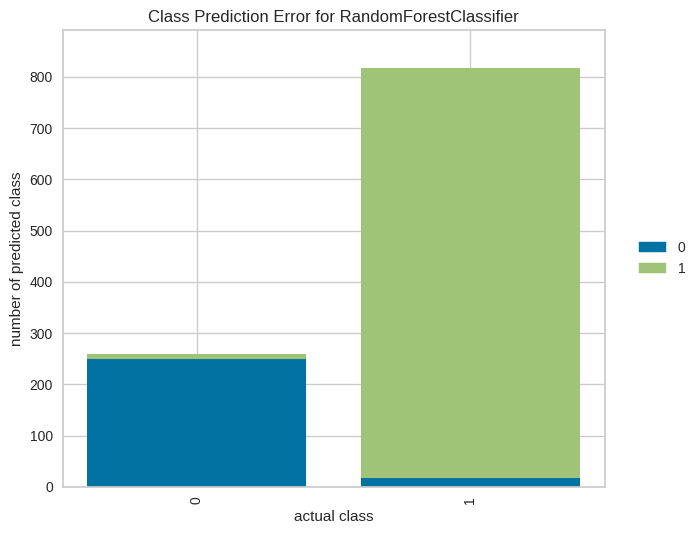

In [87]:
# plot error
plot_model(m_rf, plot = 'error')

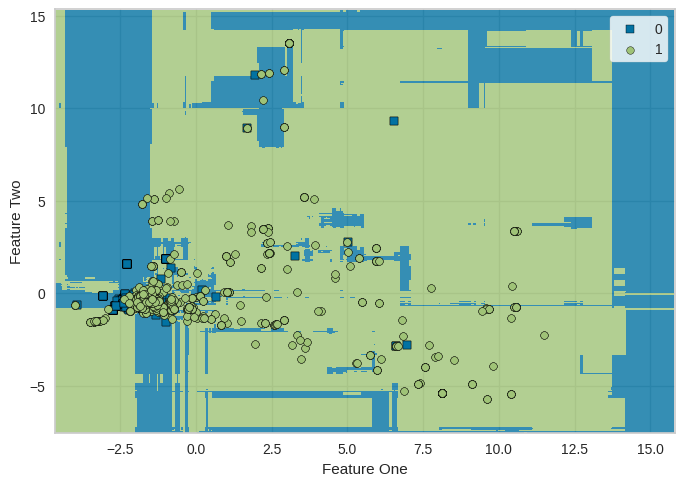

In [88]:
# plot boundary
plot_model(m_rf, plot = 'boundary', use_train_data = True)

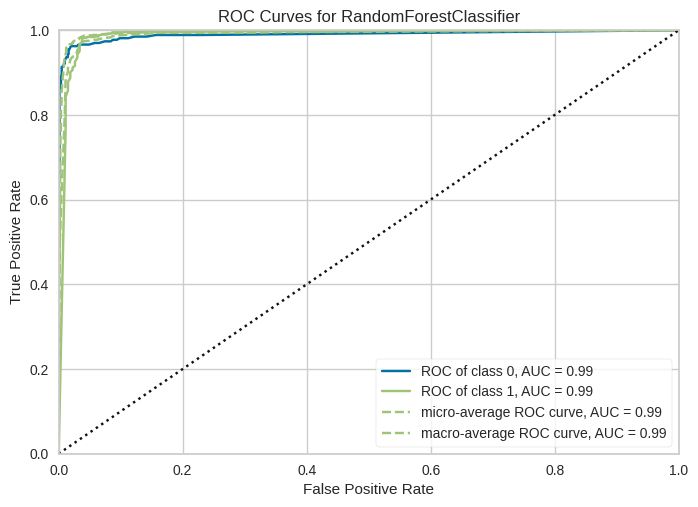

In [89]:
# plot AUC
plot_model(m_rf, plot = 'auc')

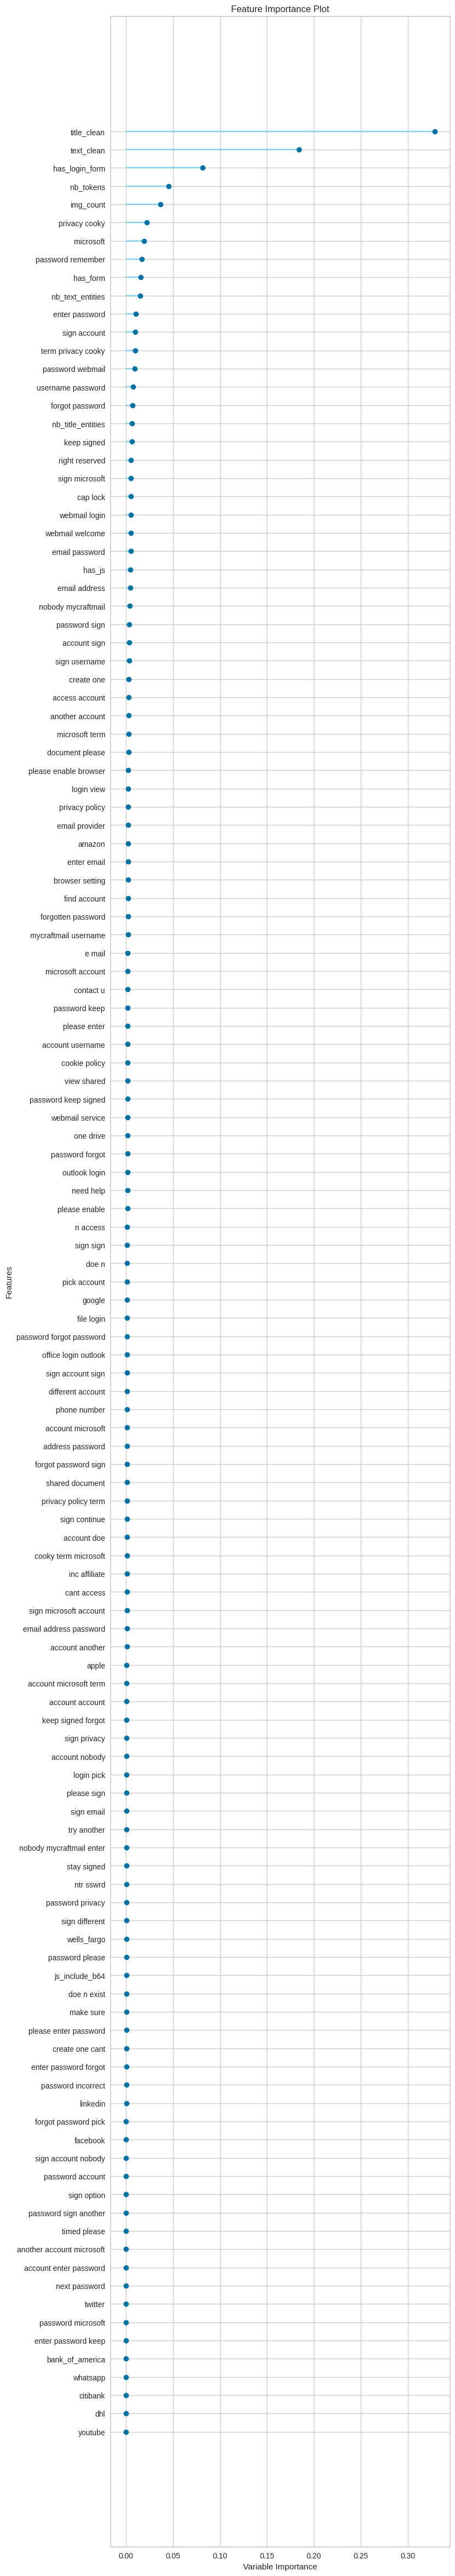

In [90]:
# plot feature importance all
plot_model(m_rf, plot = 'feature_all')

#### Extra Trees Classifier

In [91]:
#evaluate_model(m_et)

In [92]:
m_et = create_model("et")

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

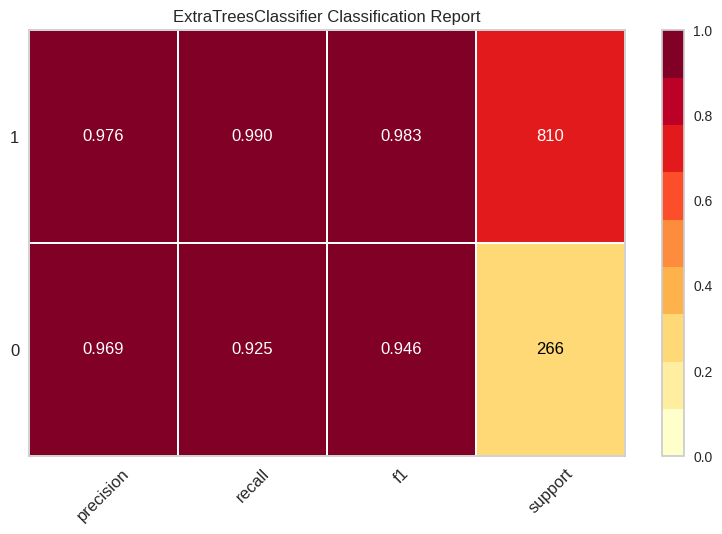

In [93]:
plot_model(m_et, plot = 'class_report')

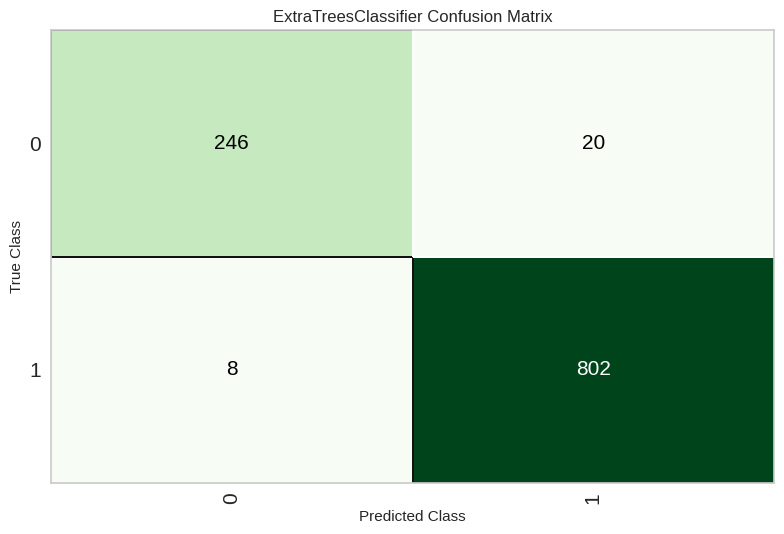

In [94]:
# plot confusion matrix
plot_model(m_et, plot = 'confusion_matrix')

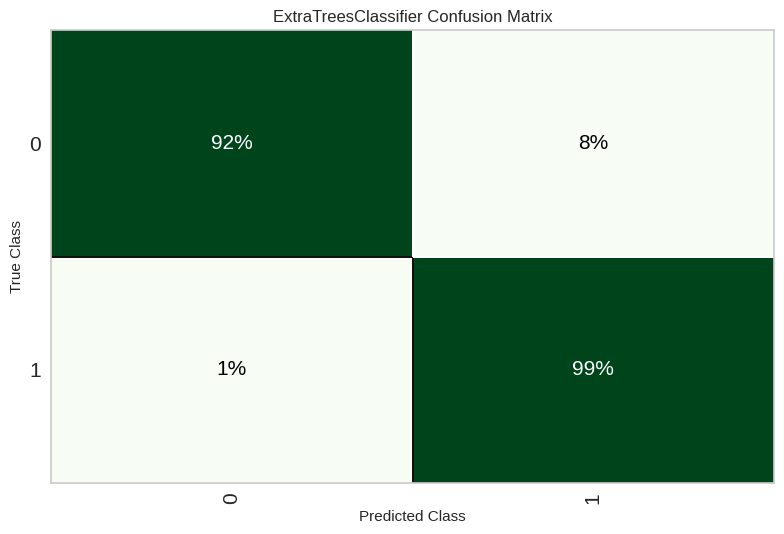

In [95]:
# plot confusion matrix
plot_model(m_et, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

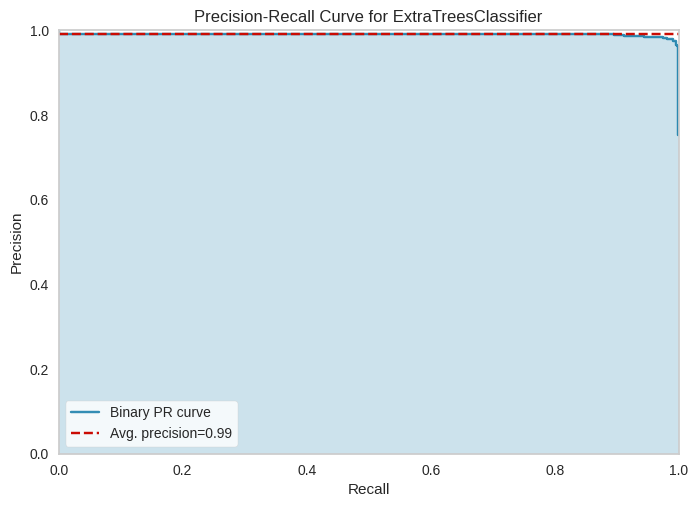

In [96]:
plot_model(m_et, plot = 'pr')

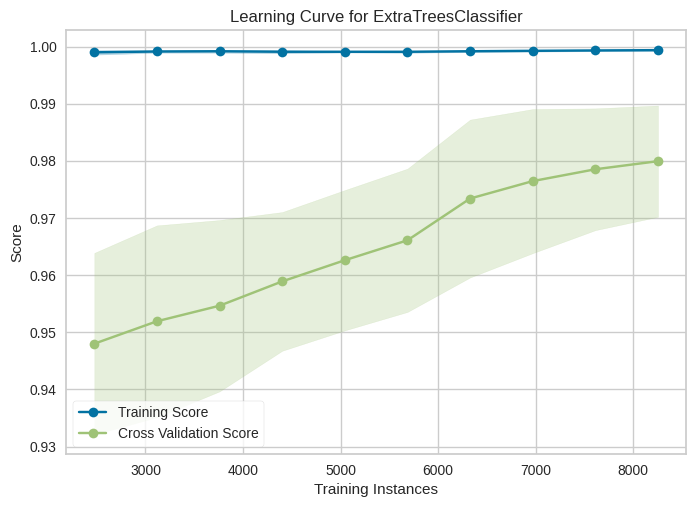

In [97]:
plot_model(m_et, plot = 'learning')

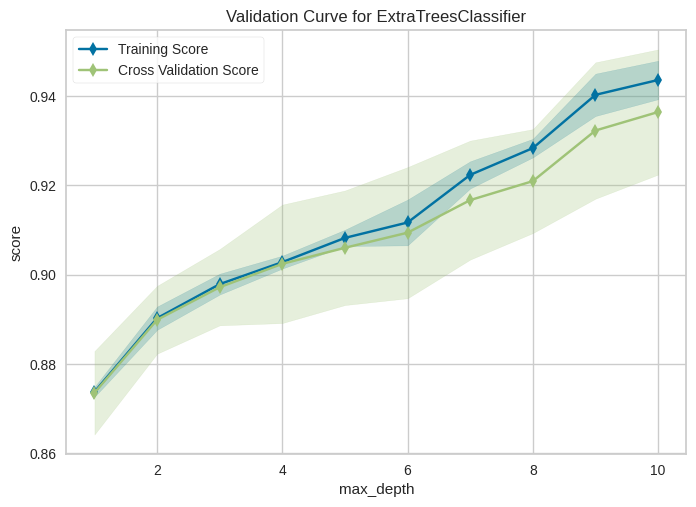

In [98]:
plot_model(m_et, plot = 'vc')

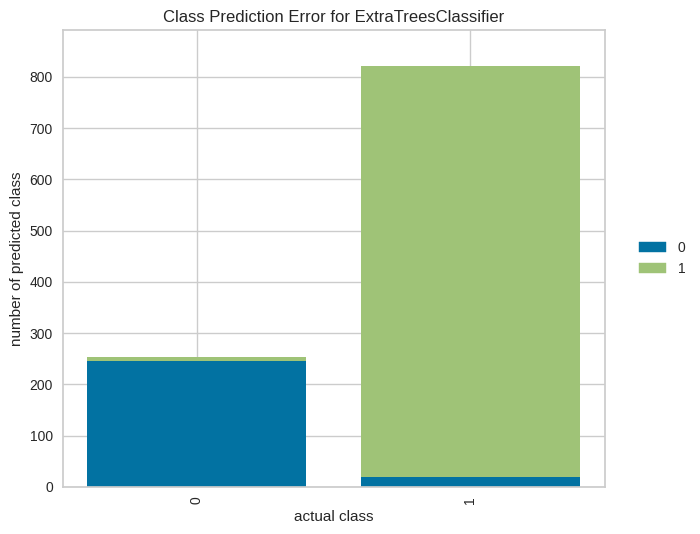

In [99]:
# plot error
plot_model(m_et, plot = 'error')

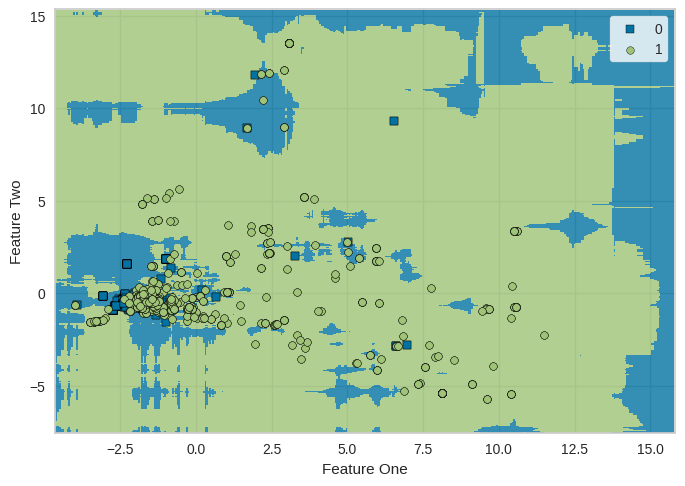

In [100]:
# plot boundary
plot_model(m_et, plot = 'boundary', use_train_data = True)

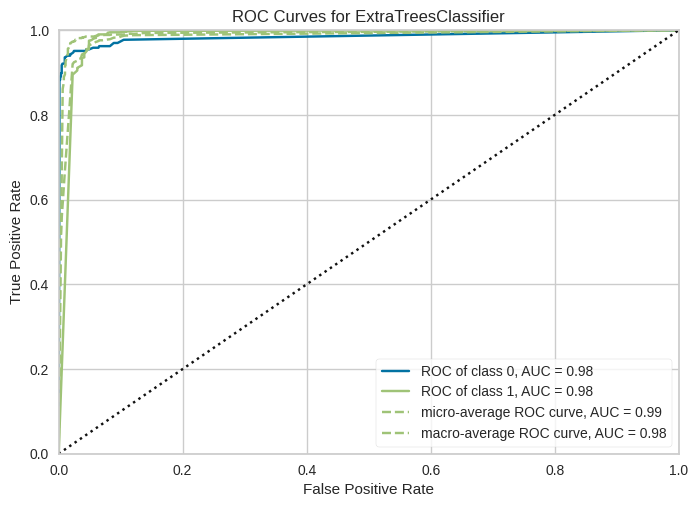

In [101]:
# plot AUC
plot_model(m_et, plot = 'auc')

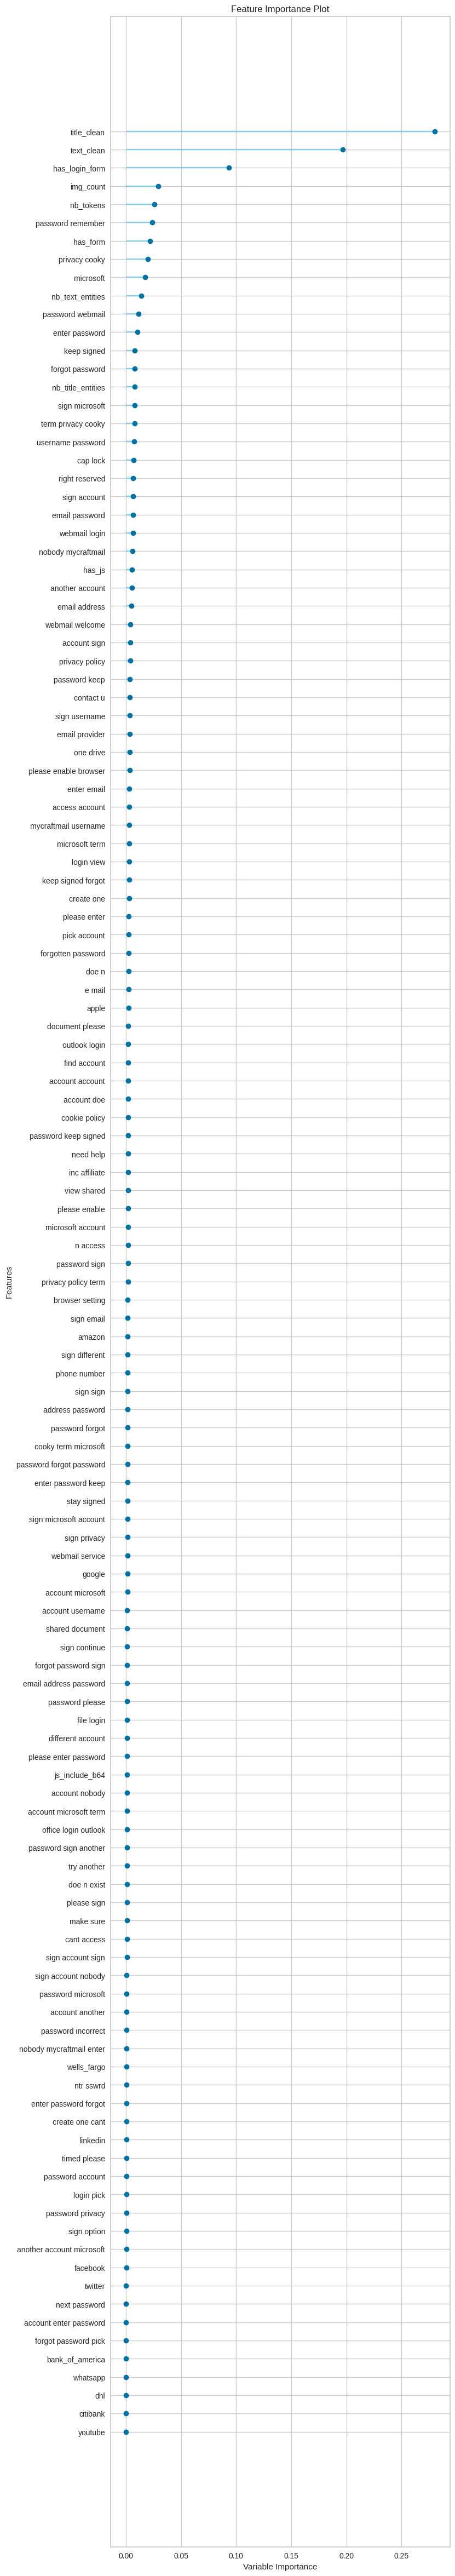

In [102]:
# plot feature importance all
plot_model(m_et, plot = 'feature_all')

### Finalize Model

Some of the key observations made by comparing the _rf_ and _et_ models are enumerated here:
* **Accuracy** is the percentage of correct classifications that a trained machine learning model achieves. _rf_ was slightly more accurate then _et_.
* **AUC** (Area under the ROC Curve) provides an aggregate measure of performance across all possible classification thresholds. _rf_ had a slightly higher AUC then _et_.
* **Recall** measures the proportion of actual positive labels correctly identified by the model. _rf_ had a slightly higher then _et_.
* **Precision** refers to the number of true positives divided by the total number of positive predictions. _rf_ had a slightly higher Precision then _et_.
* **F1** score is a metric used to measure the performance of classification machine learning models. A value greater than 0.9 is considered very good. _rf_ had a slightly better F1 score then _et_.
* The **Kappa** score is defined as the metric used to measure the performance of machine learning classification models based on assessing the perfect agreement and agreement by chance between the two raters. A kappa greater than 0.75 represents excellent agreement. Both had a kappa greater than 0.8 while _rf_ had a slightly better kappa then _et_.
* **MCC** (Matthew's correlation coefficient) is used to gauge or measure the difference between the predicted values and actual values. _rf_ had a slightly better MCC then _et_.
* Both confusion matrices were very similar and are both tilted towards the detection of malicious websites. _rf_ had slightly better results than _et_.


Since both confusion matrices were very similar and the _rf_ model had a slightly higher Accuracy, Recall, Precision, F1, Kappa and MCC, we select the _rf_ model going forward. Again, it is important to reiterate that the small sample size is very likely affecting the current results, and the full sample set would be used in the end-product, possibly resulting in the selection of a different model.


In [103]:
# display best_model
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1337, verbose=0, warm_start=False)

In [104]:
# Finalize the best model
final_model = finalize_model(tune_model(best_model, choose_better=True)) # the returned object is always better performing

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
